In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import os
import random
import cv2

In [ ]:
! pip install kaggle graphviz pydot

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nataliamorenomontoya","key":"75bd043e7f220026f1876209fccbde32"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download nataliamorenomontoya/fruits-and-vegetables-dataset-2

Dataset URL: https://www.kaggle.com/datasets/nataliamorenomontoya/fruits-and-vegetables-dataset-2
License(s): unknown
 85% 295M/348M [00:00<00:00, 575MB/s]
100% 348M/348M [00:00<00:00, 610MB/s]


In [ ]:
! unzip fruits-and-vegetables-dataset-2.zip

Archive:  fruits-and-vegetables-dataset-2.zip
  inflating: fruits_vegetables/test/beetroot/Image_1.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_2.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_3.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_4.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_5.jpg  
  inflating: fruits_vegetables/test/beetroot/Image_6.jpg  
  inflating: fruits_vegetables/test/beetroot/img-0.jpg  
  inflating: fruits_vegetables/test/beetroot/img-1.jpg  
  inflating: fruits_vegetables/test/beetroot/img-4.jpg  
  inflating: fruits_vegetables/test/beetroot/img-6.jpg  
  inflating: fruits_vegetables/test/beetroot/img-7.jpg  
  inflating: fruits_vegetables/test/beetroot/img-8.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_10.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_6.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_7.jpg  
  inflating: fruits_vegetables/test/cauliflower/Image_8.jpg  
  inflati

In [ ]:
import os
import shutil

allowed_folders = ['beetroot', 'watermelon', 'orange', 'pineapple', 'pear', 'cauliflower']

base_dirs = ['train', 'test', 'validation']

for base_dir in base_dirs:
    if os.path.exists(base_dir):
        for folder_name in os.listdir(base_dir):
            folder_path = os.path.join(base_dir, folder_name)
            if os.path.isdir(folder_path) and folder_name.lower() not in allowed_folders:
                print(f"Removing folder: {folder_path}")
                shutil.rmtree(folder_path)
    else:
        print(f"Directory not found: {base_dir}")

print("Finished removing unwanted folders.")

Directory not found: train
Directory not found: test
Directory not found: validation
Finished removing unwanted folders.


In [ ]:
print(os.listdir("fruits_vegetables/train/"))
print(os.listdir("fruits_vegetables/train/beetroot"))
print(os.listdir("fruits_vegetables/train/watermelon"))
print(os.listdir("fruits_vegetables/train/orange"))
print(os.listdir("fruits_vegetables/train/pineapple"))
print(os.listdir("fruits_vegetables/train/pear"))
print(os.listdir("fruits_vegetables/train/cauliflower"))
print(os.listdir("fruits_vegetables/validation/"))
print(os.listdir("fruits_vegetables/test/"))

['beetroot', 'cauliflower', 'pineapple', 'pear', 'watermelon', 'orange']
['OGVSH33INKOF.jpg', 'Image_3.jpg', 'Image_41.jpg', 'img-3.jpg', 'Image_72.jpg', 'Image_12.jpg', 'Image_16.jpg', 'Image_24.jpg', 'Image_52.jpg', 'Image_13.jpg', 'img-13.jpg', 'Image_48.jpg', 'Image_10.jpg', 'Image_19.jpg', 'Image_63.jpg', 'img-9.jpg', 'Image_27.jpg', 'Image_31.jpg', 'Image_81.jpg', 'Image_32.jpg', 'Image_4.jpg', 'Image_37.jpg', 'Image_54.png', 'T8NWE49S2E14.jpg', 'Image_38.jpg', 'img-10.jpg', 'Image_78.jpg', 'SNOCN6ZX54W8.jpg', 'Image_65.jpg', 'img-7.jpg', 'Image_29.jpg', 'Image_25.jpg', 'img-0.jpg', 'IZL0TTYA67YR.jpg', 'IAC3K7O54VPF.jpg', 'XI1RGVGKDVP7.jpg', 'Image_68.jpg', 'Image_47.jpg', 'Image_22.jpg', 'Image_1.jpg', 'LG236GZULDGX.jpg', 'Image_2.jpg', 'Image_76.jpg', 'Image_61.jpg', 'G8GRA77ZYMIN.jpg', 'Image_14.jpg', 'img-11.jpg', 'Image_79.jpg', 'Image_11.jpg', 'Image_17.jpg', 'img-15.jpg', 'DZHHXY447LWB.jpg', 'Image_53.jpg', 'Image_33.jpg', 'Image_64.jpg', 'img-1.jpg', 'Image_62.jpg', 'Imag

In [ ]:
print("Images in the training dataset:\n")
print("Beetroot count - ", len(os.listdir("fruits_vegetables/train/beetroot")))
print("Watermelon count - ", len(os.listdir("fruits_vegetables/train/watermelon")))
print("Orange count - ", len(os.listdir("fruits_vegetables/train/orange")))
print("Pineapple count - ", len(os.listdir("fruits_vegetables/train/pineapple")))
print("Pear count - ", len(os.listdir("fruits_vegetables/train/pear")))
print("Couliflower count - ", len(os.listdir("fruits_vegetables/train/cauliflower")))

Images in the training dataset:

Beetroot count -  105
Watermelon count -  105
Orange count -  105
Pineapple count -  105
Pear count -  105
Couliflower count -  105


In [ ]:
train_dir = "fruits_vegetables/train/"
val_dir = "fruits_vegetables/validation/"
test_dir = "fruits_vegetables/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador de Entrenamiento: Aplica Rescale Y Aumentación
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   horizontal_flip=True)

# Generador de Validación: SOLO Rescale (Para evaluación precisa)
validation_datagen = ImageDataGenerator(rescale=1./255.) # ¡Quitamos zoom, shear, rotation!

# Generador de Prueba: SOLO Rescale
test_datagen = ImageDataGenerator(rescale=1./255.)

train = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(HEIGHT, WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64)

val = validation_datagen.flow_from_directory(directory=val_dir,
                                          target_size=(HEIGHT, WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64)

test = test_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(HEIGHT, WEIGHT),
                                          class_mode="categorical",
                                          batch_size=64,
                                          shuffle=False)

print("Beetroot count - ", len(os.listdir("fruits_vegetables/train/beetroot")))
print("Watermelon count - ", len(os.listdir("fruits_vegetables/train/watermelon")))
print("Orange count - ", len(os.listdir("fruits_vegetables/train/orange")))
print("Pineapple count - ", len(os.listdir("fruits_vegetables/train/pineapple")))
print("Pear count - ", len(os.listdir("fruits_vegetables/train/pear")))
print("Couliflower count - ", len(os.listdir("fruits_vegetables/train/cauliflower")))

Found 630 images belonging to 6 classes.
Found 71 images belonging to 6 classes.
Found 70 images belonging to 6 classes.
Beetroot count -  105
Watermelon count -  105
Orange count -  105
Pineapple count -  105
Pear count -  105
Couliflower count -  105


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in mobilenet.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,GlobalAveragePooling2D, Dropout

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))


In [ ]:
print(model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


## Architecture

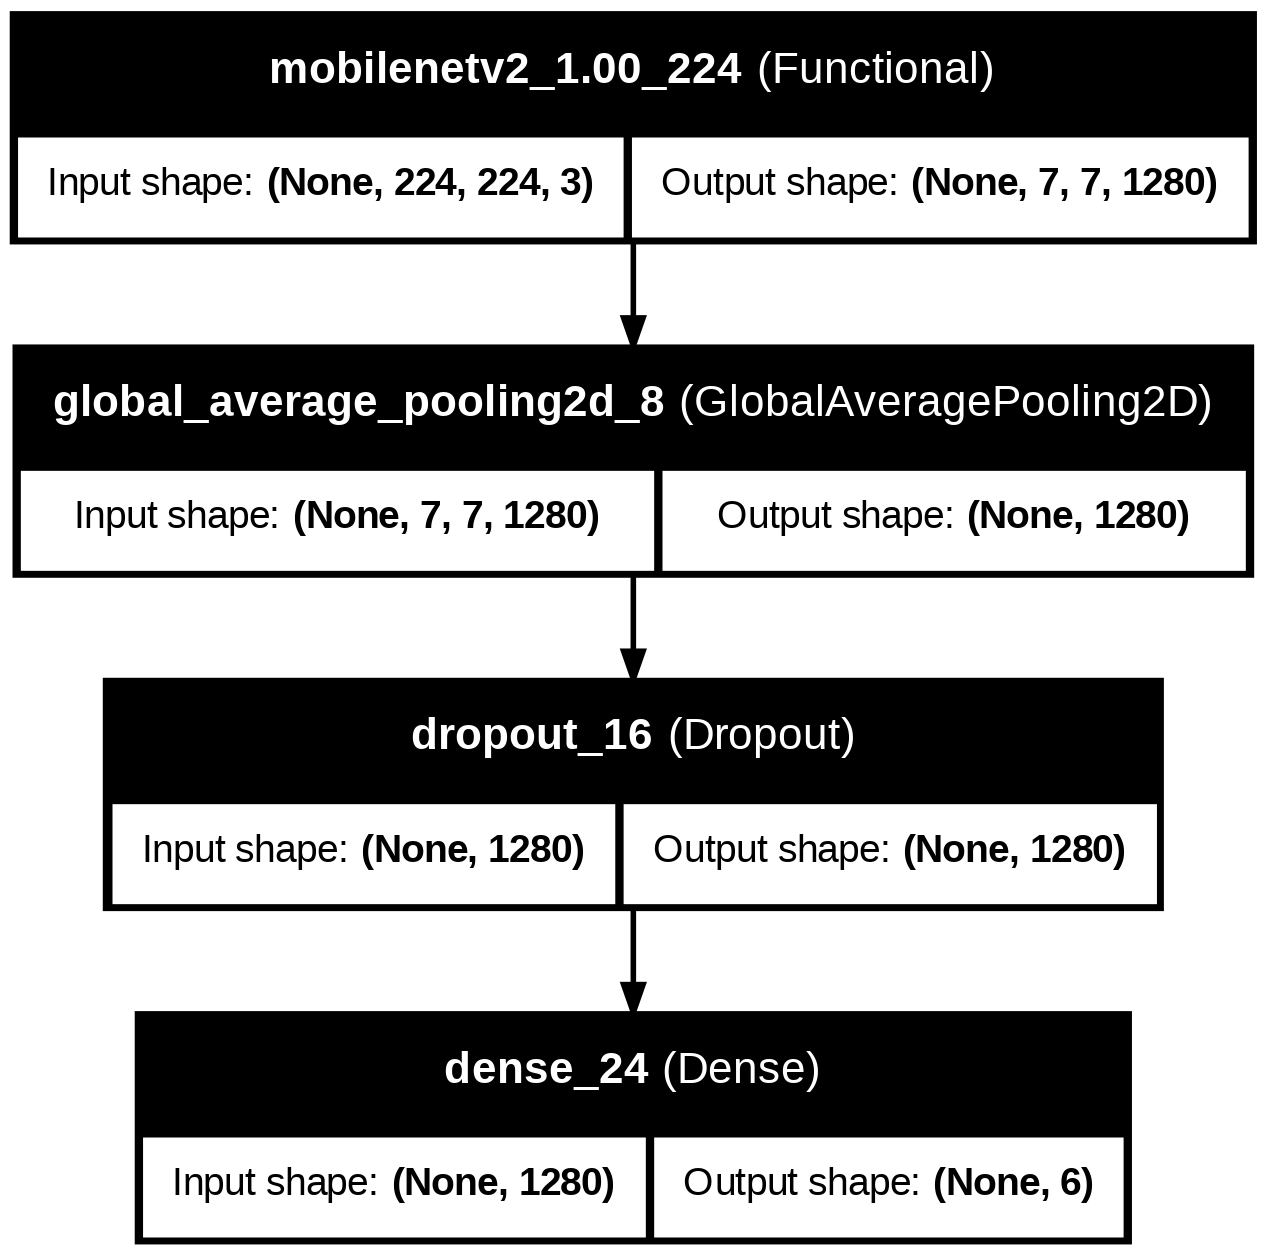

In [ ]:
# Plot
plot_model(model, to_file='topology.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train, validation_data=val, steps_per_epoch=len(train)//64, validation_steps=len(val)//64, epochs=10, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.2839 - loss: 1.9808 - val_accuracy: 0.7465 - val_loss: 0.9437
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6417 - loss: 1.0405 - val_accuracy: 0.9014 - val_loss: 0.4810
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8275 - loss: 0.5631 - val_accuracy: 0.9014 - val_loss: 0.3196
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8971 - loss: 0.3877 - val_accuracy: 0.9155 - val_loss: 0.2357
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9423 - loss: 0.2587 - val_accuracy: 0.9577 - val_loss: 0.1934
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9598 - loss: 0.1748 - val_accuracy: 0.9577 - val_loss: 0.1684
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9631 - loss: 0.1625 - val_accuracy: 0.9437 - val_loss: 0.1594
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9650 - loss: 0.1540 - val_accuracy: 0.9437 - val_loss: 0.1548
Epo

In [ ]:
loss, accuracy = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.9705 - loss: 0.0685


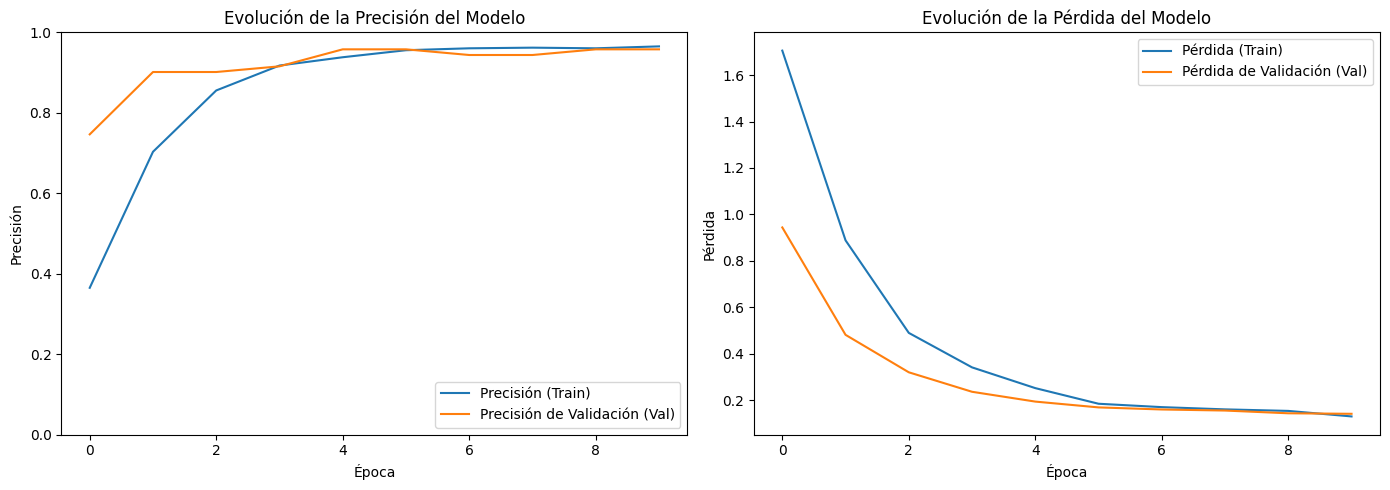

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots (1 fila, 2 columnas)
# figsize ajusta el tamaño total para que se vea bien horizontalmente
plt.figure(figsize=(14, 5))

# --- Primer Subplot: Precisión ---
plt.subplot(1, 2, 1) # Ubicación 1 de 2
plt.plot(history.history['accuracy'], label='Precisión (Train)')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación (Val)')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0, 1]) # Establecer el límite Y para precisión es crucial
plt.legend(loc='lower right')


# --- Segundo Subplot: Pérdida (Loss) ---
plt.subplot(1, 2, 2) # Ubicación 2 de 2
plt.plot(history.history['loss'], label='Pérdida (Train)')
plt.plot(history.history['val_loss'], label='Pérdida de Validación (Val)')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')


plt.tight_layout() # Asegura que los títulos y etiquetas no se superpongan
plt.show()

In [ ]:
class_names = sorted(train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Beetroot', 'Cauliflower', 'Orange', 'Pear', 'Pineapple',
       'Watermelon'], dtype='<U11')

## Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step


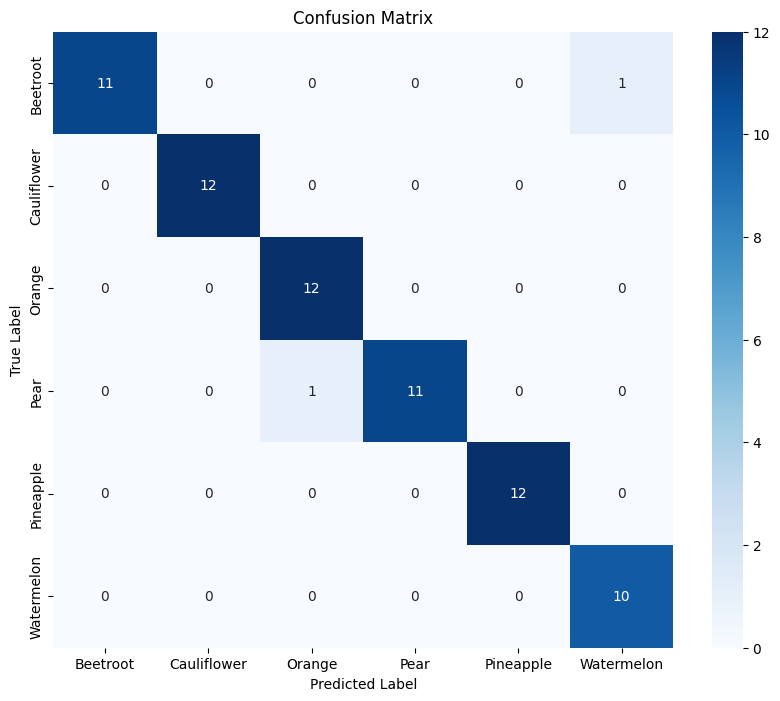

In [ ]:
y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    Beetroot       1.00      0.92      0.96        12
 Cauliflower       1.00      1.00      1.00        12
      Orange       0.92      1.00      0.96        12
        Pear       1.00      0.92      0.96        12
   Pineapple       1.00      1.00      1.00        12
  Watermelon       0.91      1.00      0.95        10

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



# **Test**

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
[[9.9032593e-01 2.9978823e-05 1.9005471e-04 1.4747386e-03 1.9856569e-04
  7.7807331e-03]]
uint8


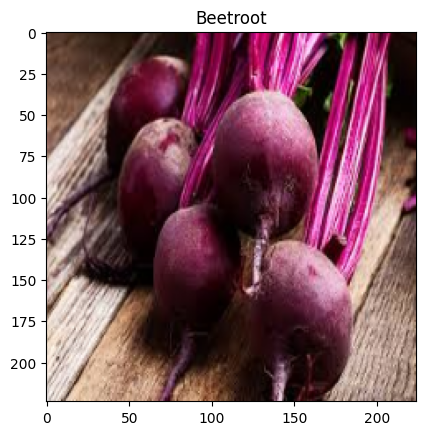

In [ ]:
import io
img=cv2.imread('/content/remolacha.jpg')
img2=cv2.resize(img,(224,224))
img_cvt=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2=np.reshape(img2,[1,224,224,3])
img2=img2/255.0
prediction=model.predict(img2)
print(prediction)
plt.imshow(img_cvt)
print(img_cvt.dtype)
plt.title(class_names[np.argmax(prediction)])
plt.show()

# Tensor Flow Lite

## Export

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
modelo_tflite = converter.convert()

In [ ]:
with open("/content/project_model.tflite", "wb") as f:
    f.write(modelo_tflite)